In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import linear_model

n = 20


data = pd.read_csv("final_data.csv")

bulk_modulus = data.iloc[:, 12]
D_bulk = data.iloc[:, 13]

X1 = data.iloc[:, 0:12]
X2 = data.iloc[:, 14: 106]

X = np.concatenate((X1, X2),axis=1)

X = StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, bulk_modulus, random_state = 1312, test_size = 0.2, shuffle=True)

In [37]:
pca = PCA(n_components=n)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11', 'principal component 12', 'principal component 13', 'principal component 14', 'principal component 15', 'principal component 16', 'principal component 17', 'principal component 18', 'principal component 19', 'principal component 20'])

In [38]:
finalDf = pd.concat([principalDf, bulk_modulus], axis = 1)

In [39]:
pca.explained_variance_ratio_

array([0.07373024, 0.0533319 , 0.04311984, 0.034583  , 0.03222754,
       0.02661687, 0.02457781, 0.0239402 , 0.02155832, 0.02083804,
       0.01984165, 0.0192842 , 0.01812908, 0.01784324, 0.0174759 ,
       0.01657531, 0.01583133, 0.01550859, 0.01494569, 0.01454315])

0.835221741654715
0.7877693674266978


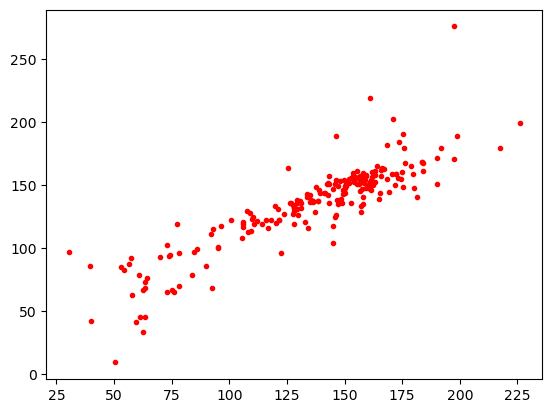

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, bulk_modulus, random_state = 1312, test_size = 0.2, shuffle=True)

regr1 = linear_model.LinearRegression()
regr1.fit(X_train, Y_train)
print(regr1.score(X_train, Y_train))
print(regr1.score(X_test, Y_test))

plt.plot(Y_test, regr1.predict(X_test), 'r.')
plt.show()